# Session 4:     Titanic Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

import statsmodels.api as sm


In [4]:
#load Titanic data
df = pd.read_csv('/home/winta/Downloads/train.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# quick grab of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allen, Mr. William Henry",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Take care of missing values:  
split the sample data into 2 samples: with filled age and without:


In [9]:
del df['Name']
del df['SibSp']
del df['Parch']
del df['Ticket']
del df['Fare']
del df['Cabin']
del df['Embarked']

with_age = df[df['Age'].notnull()]
without_age = df[df['Age'].isnull()]

In [11]:
with_age.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


In [12]:
without_age.describe()

,PassengerId,Survived,Pclass,Age
count,177.000000,177.000000,177.000000,0.0
mean,435.581921,0.293785,2.598870,NaN
std,250.552901,0.456787,0.763216,NaN
min,6.000000,0.000000,1.000000,NaN
25%,230.000000,0.000000,3.000000,NaN
50%,452.000000,0.000000,3.000000,NaN
75%,634.000000,1.000000,3.000000,NaN
max,889.000000,1.000000,3.000000,NaN


The count variable shows that 177 values are missing in the Age column.
One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582
std,257.353842,0.486592,0.836071,13.019697
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000


Now that we have the data in a dataframe, then start analysis of the data using Pandas functions. The overall chance of survival for a Titanic passenger is 0.4045. Thus, the calculation shows that only 38% of the passengers survived. 

In [15]:
df['Survived'].mean()

0.3838383838383838

In [16]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age
Pclass,,,
1,461.597222,0.629630,36.812130
2,445.956522,0.472826,29.765380
3,439.154786,0.242363,25.932627


As we have seen from the above table, passengers in first class had a 63% chance of survival, compared to a 24% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class.

In [21]:
#breakdown using the grouping function for both class and sex
class_sex_grouping = df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age
Pclass Sex                                     
1      female   469.212766  0.968085  33.978723
       male     455.729508  0.368852  38.995246
2      female   443.105263  0.921053  28.703947
       male     447.962963  0.157407  30.512315
3      female   399.729167  0.500000  23.572917
       male     455.515850  0.135447  26.911873

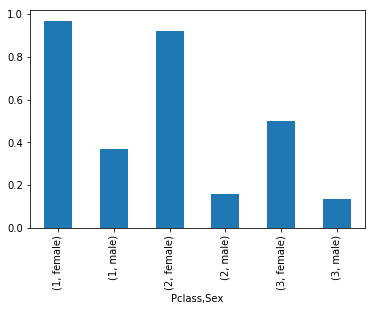

In [22]:
#plot the above table
class_sex_grouping['Survived'].plot.bar()

The statistical results clearly reflect the first part of this policy as, across all classes, women were much more likely to survive than the men. We can also see that the women were younger than the men on average, were more likely to be traveling with family, and paid slightly more for their tickets.


In [34]:
# add the column 'AgeGroup' - create groups of ages (<18 - child, >60 - senior and rest - adults)
def age_to_group(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'

    
df['AgeGroup'] = df['Age'].apply(age_to_group) 

df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,AgeGroup
0,1,0,3,male,22.0,Adult
1,2,1,1,female,38.0,Adult
2,3,1,3,female,26.0,Adult
3,4,1,1,female,35.0,Adult
4,5,0,3,male,35.0,Adult
5,6,0,3,male,28.0,Adult
6,7,0,1,male,54.0,Adult
7,8,0,3,male,2.0,Child
8,9,1,3,female,27.0,Adult
9,10,1,2,female,14.0,Child


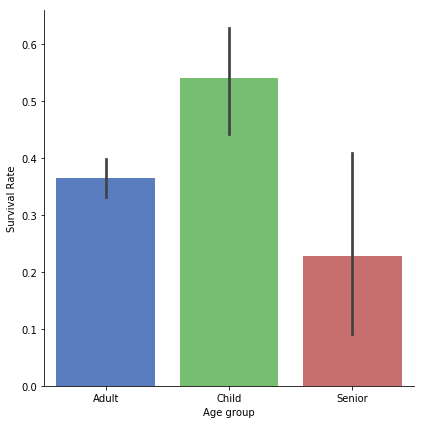

In [35]:
#plot survival rate with respect to age group
plot = sns.factorplot('AgeGroup', 'Survived',data = df, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Age group", "Survival Rate")